##  Sri lanka dengue fever EDA

### 📦️Importing Librares.¶

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 📄loading Data.

In [136]:
 dataset_url='Updated_Sri_lanka_dengue_cases_weather_weekly_2007_2024_.csv'
def Data_load(dataset_url):
    
    df=pd.read_csv(dataset_url)
    return df
df=Data_load(dataset_url)

In [13]:
df.head()

,District,Number_of_Cases,Week_Start_Date,Month,Year,Week,Week_End_Date,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Total Rain (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Weather Code,Avg Daylight Duration (hours),Avg Sunrise Time,Avg Sunset Time
0,Ampara,0,2007-01-01,1,2007,1,2007-01-08,26.9375,21.8625,28.8500,24.1000,8.0,8.0,18.2000,44.3,3,11.714583,376,1079
1,Ampara,0,2007-01-08,1,2007,2,2007-01-15,26.3500,23.3250,30.2625,26.7000,86.1,86.1,17.0250,43.6,53,11.733333,378,1082
2,Ampara,0,2007-01-15,1,2007,3,2007-01-22,27.2125,23.1625,29.5750,25.9625,3.1,3.1,20.1875,48.2,51,11.754167,380,1085
3,Ampara,0,2007-01-22,1,2007,4,2007-01-29,26.7250,23.0375,29.9500,26.1125,53.6,53.6,17.2000,42.5,61,11.783333,381,1088
4,Ampara,0,2007-01-29,1,2007,5,2007-02-05,27.3625,22.9625,30.7500,26.1250,8.2,8.2,17.2625,40.0,51,11.812500,382,1090


### 🔍️Discovering Data.

In [15]:
def discovering_data(df):
    print(f'Number of variables: {df.shape[1]}')
    print(f'Number of observations: {df.shape[0]}')
    print(f'Number of duplicates: {df.duplicated().sum()}')
    print(f'Missing cells: {df.isnull().sum().sum()}')
    print(f'Numeric values: {len(df.select_dtypes(include=np.number).columns)}')
    print(f'Categorical values: {len(df.select_dtypes(include="O").columns)}')
discovering_data(df)

Number of variables: 19
Number of observations: 22900
Number of duplicates: 0
Missing cells: 0
Numeric values: 16
Categorical values: 3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22900 entries, 0 to 22899
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District                       22900 non-null  object 
 1   Number_of_Cases                22900 non-null  int64  
 2   Week_Start_Date                22900 non-null  object 
 3   Month                          22900 non-null  int64  
 4   Year                           22900 non-null  int64  
 5   Week                           22900 non-null  int64  
 6   Week_End_Date                  22900 non-null  object 
 7   Avg Max Temp (°C)              22900 non-null  float64
 8   Avg Min Temp (°C)              22900 non-null  float64
 9   Avg Apparent Max Temp (°C)     22900 non-null  float64
 10  Avg Apparent Min Temp (°C)     22900 non-null  float64
 11  Total Precipitation (mm)       22900 non-null  float64
 12  Total Rain (mm)                22900 non-null 

In [138]:
#Convert a columns to datetime
df['Week_Start_Date']= pd.to_datetime(df['Week_Start_Date'], format='%Y-%m-%d')
df['Week_End_Date']= pd.to_datetime(df['Week_End_Date'], format='%Y-%m-%d')

### Summary Statistics 

In [24]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Number_of_Cases,22900.0,34.739607,0.0,2.0,9.0,31.0,2631.0,87.523903
Week_Start_Date,22900,2015-10-08 12:00:00,2007-01-01 00:00:00,2011-05-21 06:00:00,2015-10-08 12:00:00,2020-02-25 18:00:00,2024-07-15 00:00:00,NaN
Month,22900.0,6.437773,1.0,3.0,6.0,9.0,12.0,3.444179
Year,22900.0,2015.276201,2007.0,2011.0,2015.0,2020.0,2024.0,5.073494
Week,22900.0,26.222707,1.0,13.0,26.0,39.0,53.0,15.033863
Week_End_Date,22900,2015-10-15 12:00:00,2007-01-08 00:00:00,2011-05-28 06:00:00,2015-10-15 12:00:00,2020-03-03 18:00:00,2024-07-22 00:00:00,NaN
Avg Max Temp (°C),22900.0,29.604291,15.6,28.15,29.425,31.4125,38.6125,3.029898
Avg Min Temp (°C),22900.0,23.525223,7.2125,22.45,24.025,25.2875,29.2625,2.765298
Avg Apparent Max Temp (°C),22900.0,33.941691,13.4875,32.3,34.125,36.2875,44.3375,3.733032
Avg Apparent Min Temp (°C),22900.0,26.90396,4.7125,25.7,27.7875,29.075,33.85,3.588574


- <ins>**Key Insights**</ins>
1. Number of Cases:
   - Count: 22,900 observations.
   - Mean: Approximately 34.74 cases.
   - Range: From 0 to 87 cases.
2. Temperature:
   - Average Maximum Temperature: Mean of 29.60°C, ranging from 15.8°C to 38.6°C.
   - Average Minimum Temperature: Mean of 23.53°C, ranging from 7.2°C to 29.2°C.
   - Average Apparent Maximum Temperature: Mean of 33.94°C, ranging from 13.5°C to 44.3°C.
   - Average Apparent Minimum Temperature: Mean of 26.90°C, ranging from 4.7°C to 33.1°C.
3. Precipitation:
   - Total Precipitation: Mean of 42.02 mm, ranging from 0 to 599 mm.
   - Total Rain: Similar statistics to total precipitation, indicating they might be the same measure.
4. Wind:
   - Average Wind Speed: Mean of 16.09 km/h, ranging from 3.6 km/h to 42 km/h.
   - Maximum Wind Gusts: Mean of 45.62 km/h, ranging from 20.9 km/h to 314.1 km/h.
5. Time Variables:
   - Year: Data spans from 2007 to 2024.
   - Month: Data covers all months, with a mean month value of around 6 months, indicating a slight skew towards the first half of the year.
   - Week: Data covers all weeks of the year, with a mean week value of around 26 weeks .

es.

**Interpretation**
- **Temperature and Dengue Cases**: Higher temperatures, especially apparent temperatures, might correlate with increased dengue cases.
- **Precipitation and Dengue Cases**: High precipitation levels could indicate periods of increased dengue cases, as standing water is a breeding ground for mosquitoes.
- **Seasonality**: The data spans multiple years and months, allowing for the analysis of seasonal trends in dengue cases.

### Data Distribution

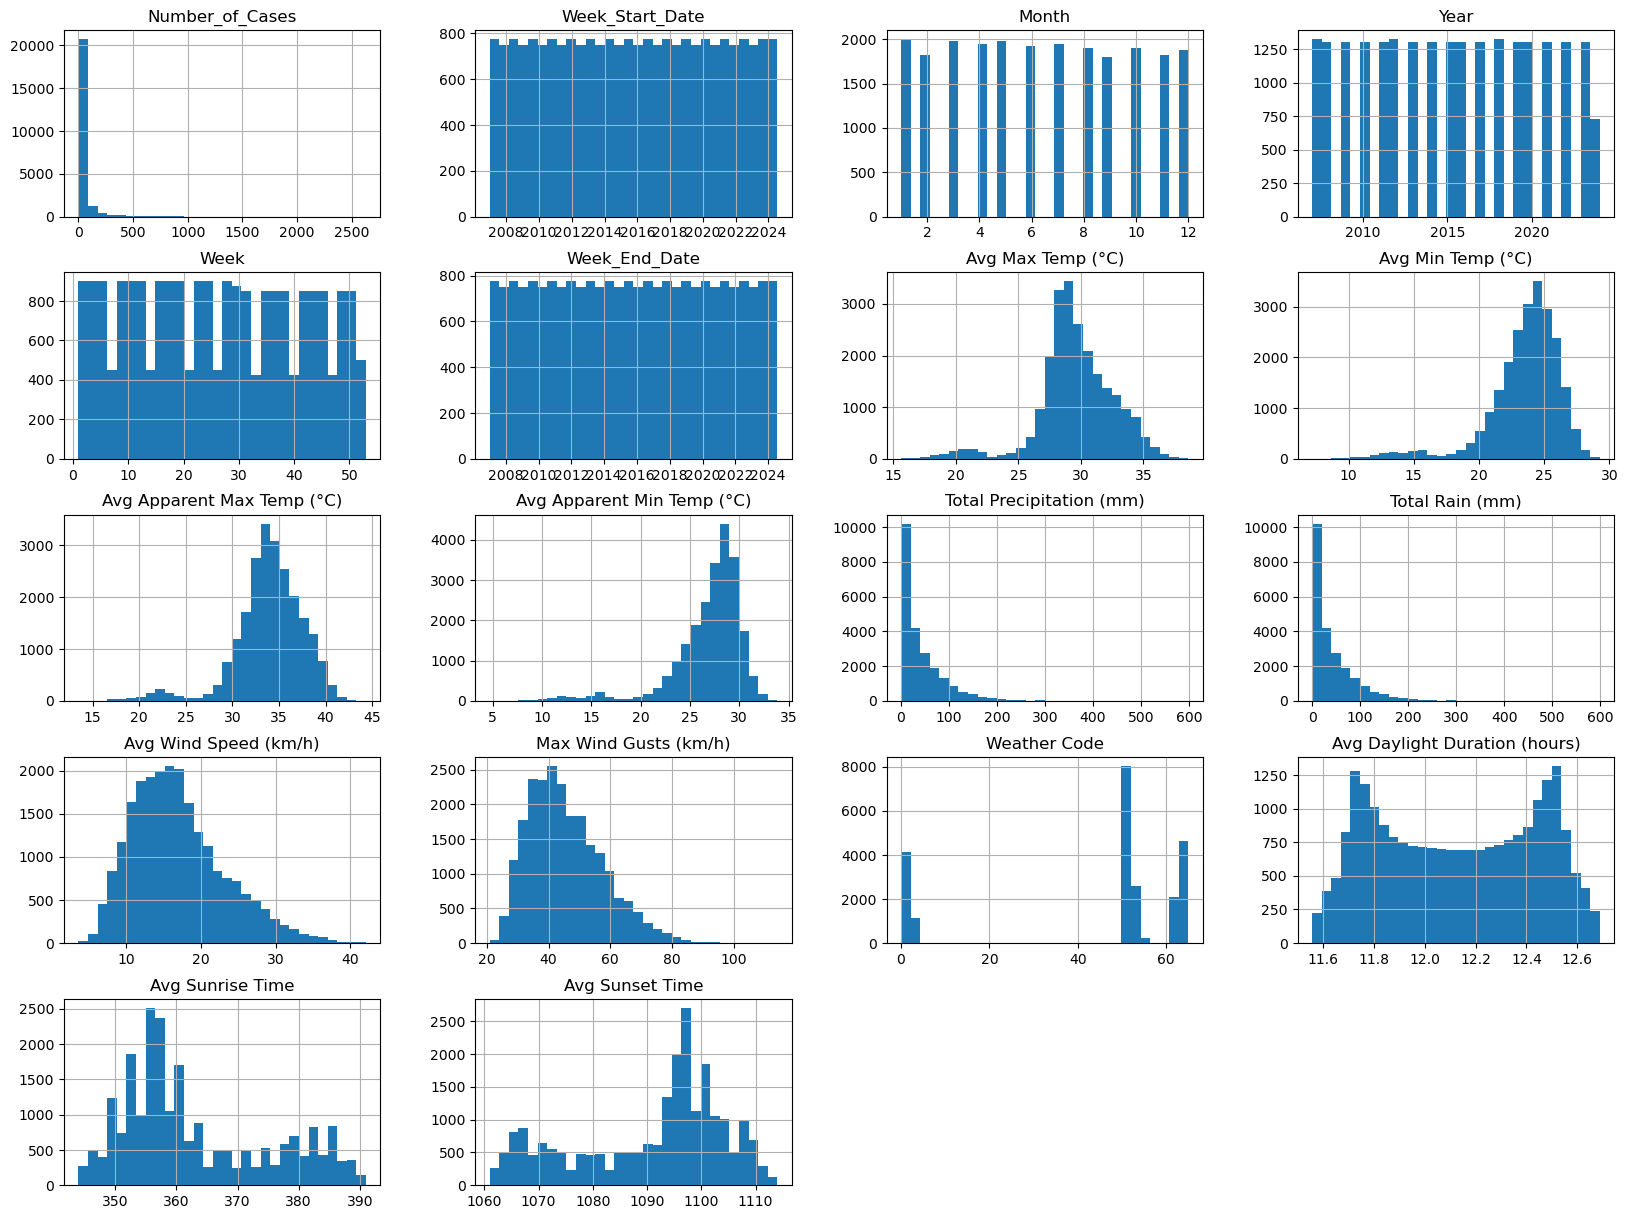

In [52]:

df.hist(bins=30,figsize=(20, 15))
plt.show()

### Trend Analysis

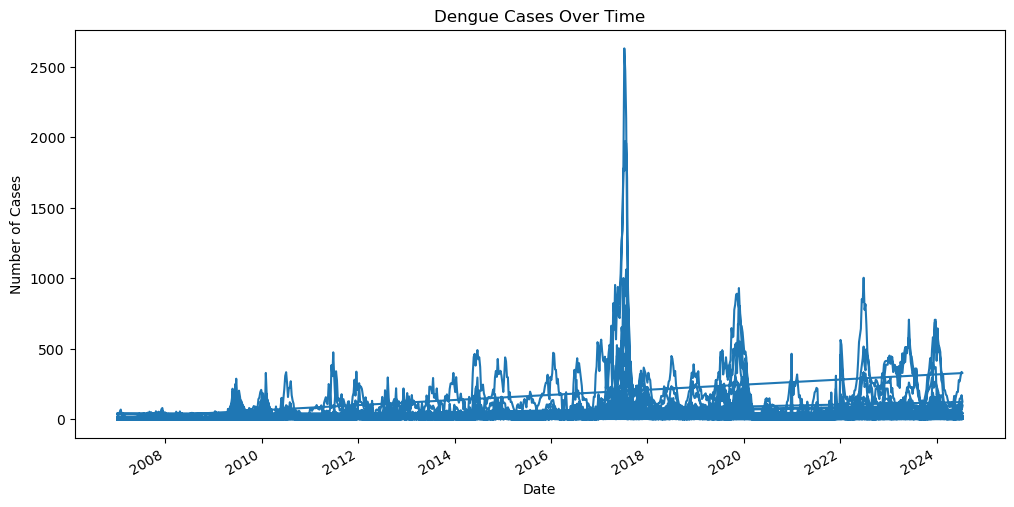

In [57]:
#df['date'] = pd.to_datetime(df['date'])
df.set_index('Week_Start_Date', inplace=True)
df['Number_of_Cases'].plot(figsize=(12, 6), title='Dengue Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


<ins>**Key Insights**</ins>
1. **Fluctuations in Dengue Cases:**
The graph shows significant fluctuations in the number of dengue cases over time, indicating periods of outbreaks followed by declines.
2. **Notable Peaks:**
There are several peaks in the graph, with the most notable peak occurring just before 2016. This peak is significantly higher than the others, suggesting a major outbreak at that time.
3. **Trends Over Time:**
The graph indicates a cyclical pattern, with dengue cases rising and falling periodically. This could be due to seasonal factors, public health interventions, or other variables.

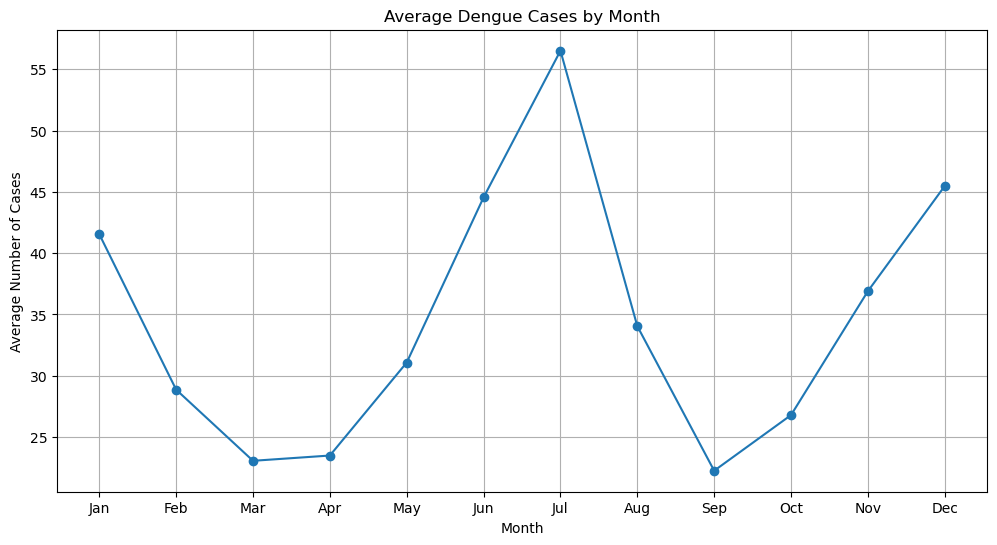

In [77]:
monthly_cases = df['Number_of_Cases'].resample('ME').mean()
# Extract month from the date index for plotting
monthly_cases_by_month = monthly_cases.groupby(monthly_cases.index.month).mean()

# Plotting the seasonality
plt.figure(figsize=(12, 6))
plt.plot(monthly_cases_by_month.index, monthly_cases_by_month.values, marker='o')
plt.title('Average Dengue Cases by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Cases')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

#### <ins>Key insight:</ins>
1. **Seasonal Peaks**: There are two significant peaks in dengue cases, one around May and another around October. This suggests that dengue outbreaks are more likely to occur during these months.
2.  **Low Periods**: The number of cases drops significantly around February, June, and November, indicating periods with lower dengue activity.
3.  **Overall Trend**: The pattern suggests a bimodal distribution, with two distinct periods of high dengue activity each year.

In [109]:
df['District'].value_counts()

District
Ampara          916
Kurunegala      916
Trincomalee     916
Ratnapura       916
Puttalam        916
Polonnaruwa     916
NuwaraEliya     916
Mullaitivu      916
Monaragala      916
Matara          916
Matale          916
Mannar          916
Kilinochchi     916
Anuradhapura    916
Kegalle         916
Kandy           916
Kalutara        916
Jaffna          916
Hambantota      916
Gampaha         916
Galle           916
Colombo         916
Batticaloa      916
Badulla         916
Vavuniya        916
Name: count, dtype: int64

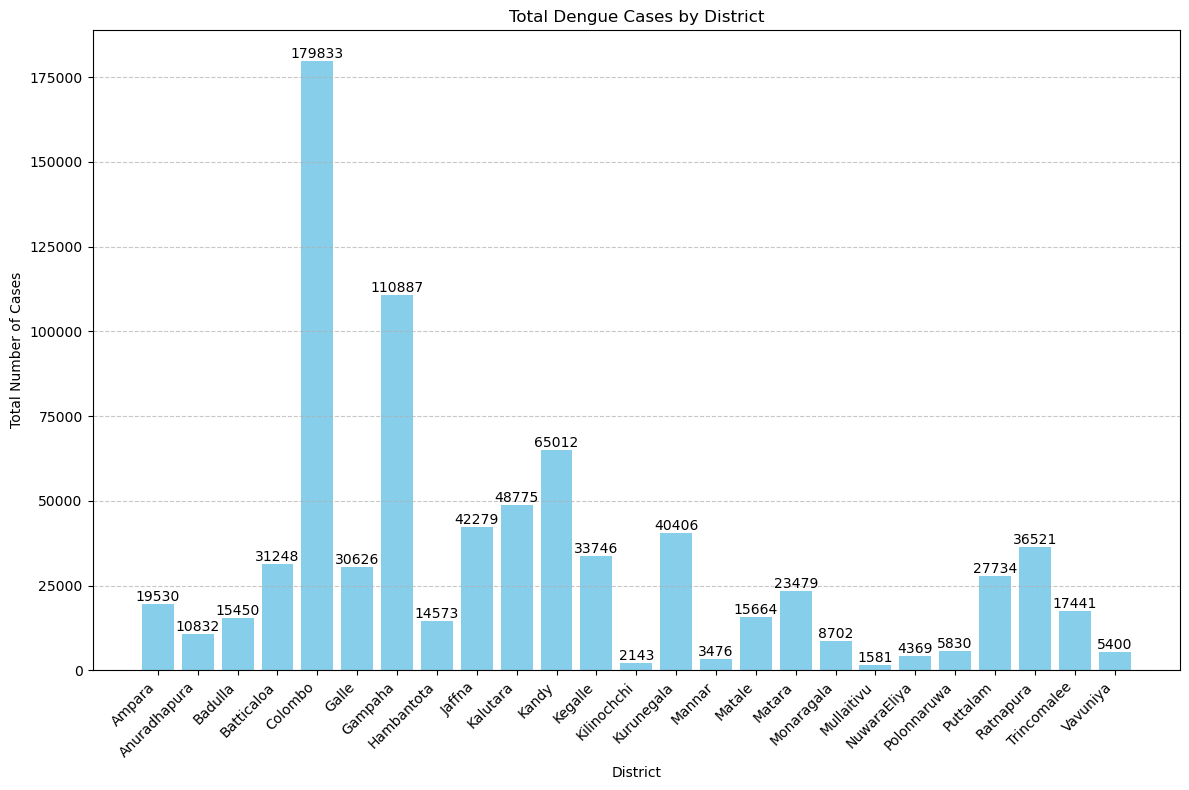

In [119]:
# Summarize dengue cases by District
cases_by_district = df.groupby('District')['Number_of_Cases'].sum().reset_index()
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(cases_by_district['District'], cases_by_district['Number_of_Cases'], color='skyblue')

# Adding labels and title
plt.xlabel('District')
plt.ylabel('Total Number of Cases')
plt.title('Total Dengue Cases by District')
plt.xticks(rotation=45, ha='right')  # Rotate district names for better readability

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

s.

#### <ins>Key insight:</ins>
1. **High-Risk Districts**: One district stands out with approximately 179,833 cases, significantly higher than others. This indicates a critical area that may require immediate public health interventions.
2. **Distribution of Cases**: The chart shows a wide range of dengue cases across different districts, highlighting areas with varying levels of dengue incidence. This can help in prioritizing resource allocation and targeted interventions.
3. **Comparative Analysis**: By comparing the number of cases across districts, you can identify patterns or common factors in high-incidence areas, such as population density, climate conditions, or effectiveness of public health measures.

### Correlation Analysis

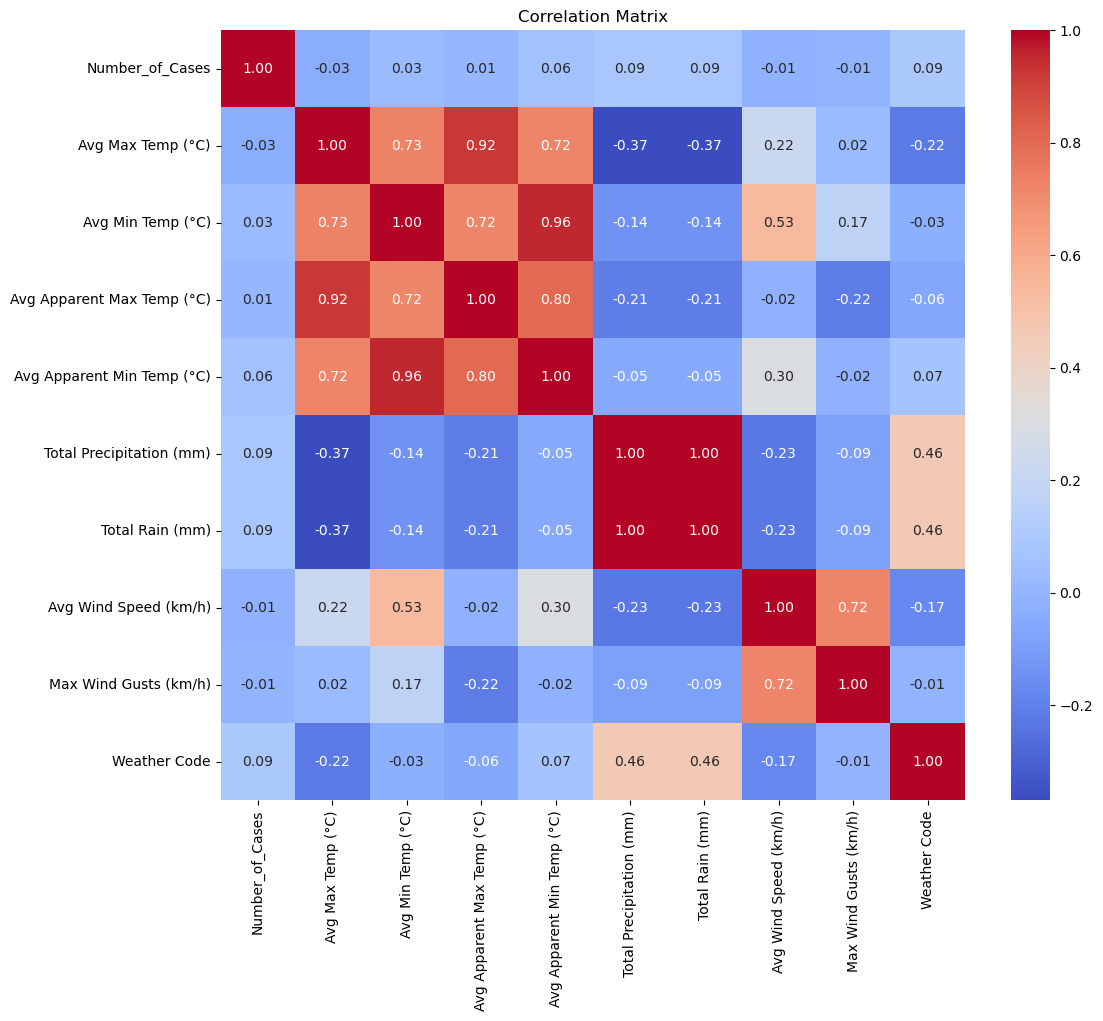

In [127]:
# Weather Variables
#Compute correlations
correlation = df[['Number_of_Cases', 'Avg Max Temp (°C)','Avg Min Temp (°C)','Avg Apparent Max Temp (°C)','Avg Apparent Min Temp (°C)','Total Precipitation (mm)','Total Rain (mm)','Avg Wind Speed (km/h)','Max Wind Gusts (km/h)','Weather Code']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

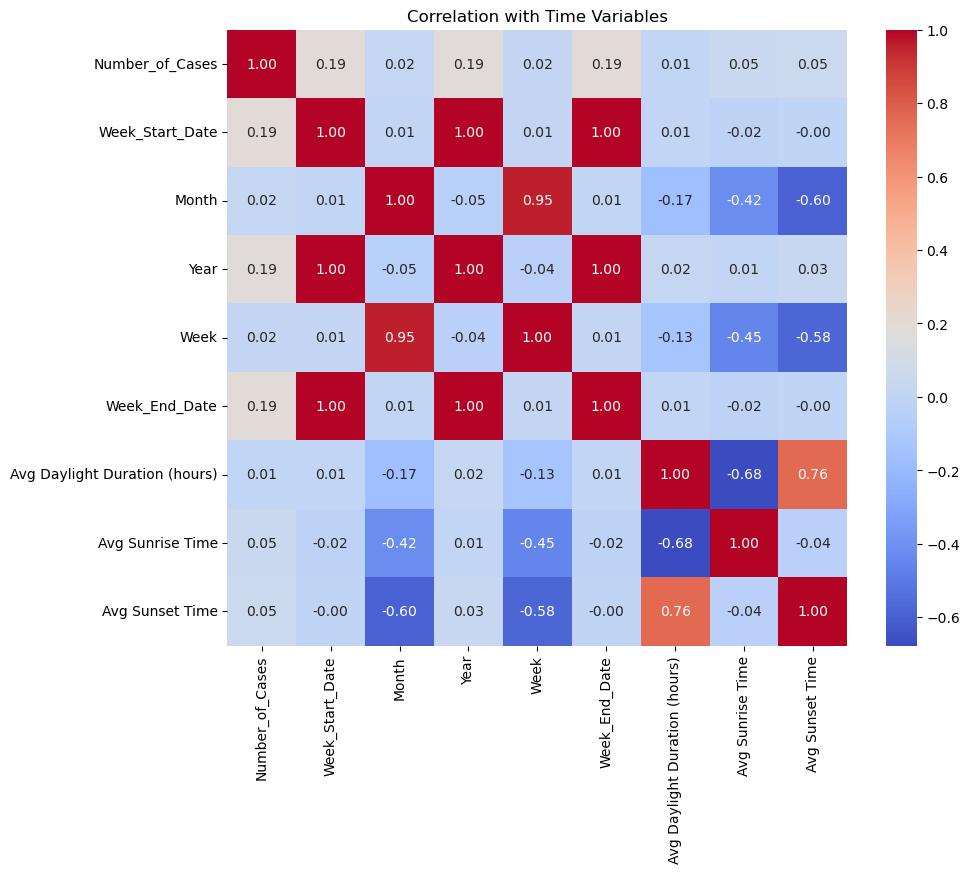

In [142]:
# Time Variables
# Compute correlations with time variables
time_corr = df[['Number_of_Cases', 'Week_Start_Date', 'Month', 'Year', 'Week', 'Week_End_Date',
                    'Avg Daylight Duration (hours)', 'Avg Sunrise Time', 'Avg Sunset Time']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(time_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Time Variables')
plt.show()